## Sudoku

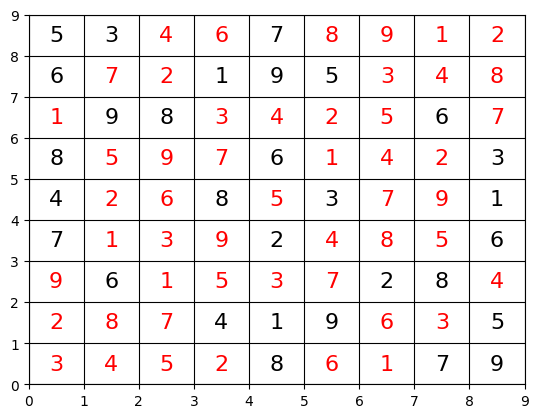

In [1]:
import numpy as np
import matplotlib.pyplot as plt

puzzle = np.array([
    [5, 3, 0, 0, 7, 0, 0, 0, 0],
    [6, 0, 0, 1, 9, 5, 0, 0, 0],
    [0, 9, 8, 0, 0, 0, 0, 6, 0],
    [8, 0, 0, 0, 6, 0, 0, 0, 3],
    [4, 0, 0, 8, 0, 3, 0, 0, 1],
    [7, 0, 0, 0, 2, 0, 0, 0, 6],
    [0, 6, 0, 0, 0, 0, 2, 8, 0],
    [0, 0, 0, 4, 1, 9, 0, 0, 5],
    [0, 0, 0, 0, 8, 0, 0, 7, 9]
])


def search_sub_matrix(puzzle, i, j):
    h_start, h_end, v_start, v_end = None, None, None, None
    intervals = [range(0, 3), range(3, 6), range(6, 9)]
    for interval in intervals:
        if i in interval:
            h_start = interval.start
            h_end = interval.stop
        if j in interval:
            v_start = interval.start
            v_end = interval.stop
    return puzzle[h_start:h_end, v_start:v_end]


def solve(puzzle):
    # 第i行第j列
    for i in range(9):
        for j in range(9):
            sub_puzzle = search_sub_matrix(puzzle, i, j)
            if puzzle[i, j] == 0:
                for candidate_num in range(1, 10):
                    if (candidate_num not in puzzle[i, :] and 
                        candidate_num not in puzzle[:, j] and 
                        candidate_num not in sub_puzzle
                    ):
                        puzzle[i, j] = candidate_num
                        if solve(puzzle):
                            return True
                        else:
                            puzzle[i, j] = 0
                return False
    return True


def sudoku(puzzle):
    solve(puzzle)
    return puzzle


def show_result(original, solved):
    fig, ax = plt.subplots()
    ax.set_xticks(np.arange(0, 10, 1))
    ax.set_yticks(np.arange(0, 10, 1))
    ax.grid(True, color='black')
    
    for i in range(9):
        for j in range(9):
            num = solved[i, j]
            if original[i, j] == 0:
                color = "red"
            else:
                color = "black"
            ax.text(j + 0.5, 8.5 - i, str(num), color=color,
                    ha='center', va='center', fontsize=16)
            
    plt.show()
    
original = puzzle.copy()
solved = sudoku(puzzle)

show_result(original, solved)

## Points dans un carré

In [37]:
import numpy as np

side = 3
points = [[0,0], [0,1], [0,2], [0,3], [3,0], [3,1], [3,2], [3,3], [1,0], [2,0], [1,3], [2,3], [3,1], [3,2]]
k = 4

def manhattan(point1: list[int], point2: list[int]):
    return np.abs(point1[0] - point2[0]) + np.abs(point1[1] - point2[1])

def is_valid(candidate_list, min_distance):
    if len(candidate_list) == 1:
        return True
    
    for p in candidate_list[1:]:
        if manhattan(p, candidate_list[0]) < min_distance:
            return False
        
    return is_valid(candidate_list[1:], min_distance)

def subpoints(points, k):
    result = []
    path = []
    
    def backtrack(start):
        if len(path) == k:
            result.append(path[:])
            return
        for i in range(start, len(points)):
            path.append(points[i])
            backtrack(i+1)
            path.pop()
            
    backtrack(0)
    return result


def distance_and_points(candidate_lists):
    min_distance = 0
    while True:
        valid_candidates = []
        for candidate_list in candidate_lists:
            if is_valid(candidate_list, min_distance):
                valid_candidates.append(candidate_list)
        if not valid_candidates:
            min_distance -= 1
            return min_distance
            
        min_distance += 1
        
        
candidate_lists = subpoints(points, k)
distance_and_points(candidate_lists)

3

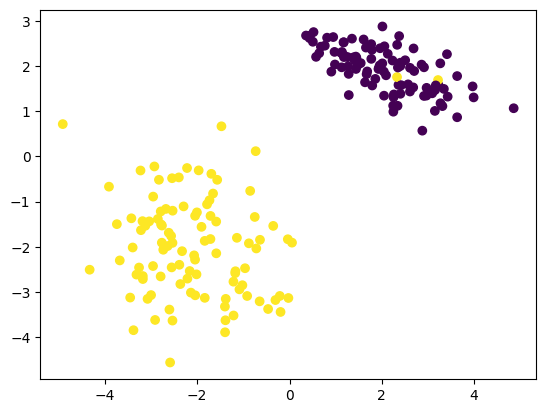

In [171]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

X, y = make_classification(
    n_samples=200,     # 样本数
    n_features=2,      # 特征维度
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    class_sep=2.0,     # 类别分离度（越大越容易分）
    random_state=40
)

for i, label in enumerate(y):
    if label == 0:
        y[i] = -1

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [172]:
class SVM:
    def __init__(self, kernel, C, lr=1e-4, epochs=1000):
        # alpha : (200, 1)
        # y : (200, 1)
        # X : (200, 2)
        self.X = None
        self.y = None
        self.w = None
        self.b = None
        self.alpha = None
        self.kernel = kernel
        self.C = C
        self.lr = lr
        self.epochs = epochs
        
    def _rbf_kernel(self, X1, X2):
        """
        X1: (n1, d)
        X2: (n2, d)
        return: (n1, n2) 矩阵，K[i,j] = exp(-gamma ||X1[i]-X2[j]||^2)
        """
        sq1 = np.sum(X1**2, axis=1, keepdims=True)      # (n1, 1)
        sq2 = np.sum(X2**2, axis=1)[None, :]           # (1, n2)
        dists = sq1 - 2 * X1 @ X2.T + sq2              # (n1, n2)
        return np.exp(-self.gamma * dists)
        
    def fit(self, X, y):
        n = X.shape[0]
        self.X = X
        self.y = y
        y = y.reshape(-1, 1)
        alpha = np.random.randn(X.shape[0], 1)
        
        if self.kernel == "linear":
            # linear kernel
            K = X @ X.T      
            Q = (y @ y.T) * K
        
            for _ in range(self.epochs):
                lag = -0.5 * alpha.T @ Q @ alpha + np.sum(alpha)
                grad_alpha = 1 - (alpha.T @ Q)
                alpha += self.lr * grad_alpha.T
                alpha = np.clip(alpha, 0, self.C)
                alpha -= (alpha.T @ y) / np.sum(y ** 2) * y
            
            self.alpha = alpha
            self.w = (alpha * y).T @ X
            # 选一个支持向量算 b
            sv = (alpha > 1e-5).ravel()
            k = np.where(sv)[0][0]
            self.b = y[k] - X[k] @ self.w.T
        
        elif self.kernel == "rbf":
            # build rbf kernel
            K = np.zeros((n, n))
            self.gamma = 1 / (2 * np.var(X))
            for i in range(n):
                for j in range(n):
                    K[i, j] = np.exp(-self.gamma * np.linalg.norm(X[i] - X[j]) ** 2)
            Q = (y @ y.T) * K
            
            for _ in range(self.epochs):
                lag = -0.5 * alpha.T @ Q @ alpha + np.sum(alpha)
                grad_alpha = 1 - (alpha.T @ Q)
                alpha += self.lr * grad_alpha.T
                alpha = np.clip(alpha, 0, self.C)
                alpha -= (alpha.T @ y) / np.sum(y ** 2) * y
            
            self.alpha = alpha
            self.w = None   # 对 RBF 来说没意义
            sv = (alpha > 1e-5).ravel()
            k = np.where(sv)[0][0]                  # 任选一个支持向量
            coeff = alpha * y                       # (n, 1)
            K_sv = self._rbf_kernel(X[k:k+1], X)    # (1, n)
            # b = y_k - Σ α_i y_i K(x_i, x_k)
            self.b = float((y[k] - K_sv @ coeff)[0][0])
            
    
    def predict(self, X_test):
        if self.kernel == "linear":
            scores =  X @ self.w.T + self.b
        elif self.kernel == "rbf":
            K = self._rbf_kernel(X_test, self.X)
            coeff = self.alpha * self.y.reshape(-1, 1)
            scores = K @ coeff + self.b
        return np.sign(scores).ravel()
    
    def visualize(self):
        assert self.X.shape[1] == 2
        
        X = self.X
        y = self.y.reshape(-1)
        
        # plot X points
        plt.figure(figsize=(6,6))
        plt.scatter(self.X[:, 0], self.X[:, 1], c=y, cmap='bwr', s=40, edgecolors='k')
        
        # grid
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(
            np.linspace(x_min, x_max, 200),
            np.linspace(y_min, y_max, 200)
        )
        grid = np.c_[xx.ravel(), yy.ravel()]   # (N_grid, 2)
        
        # 对网格点算决策值
        if self.kernel == "linear":
            Z = (grid @ self.w.T + self.b).reshape(xx.shape)
        elif self.kernel == "rbf":
            K_grid = self._rbf_kernel(grid, self.X)           # (N_grid, n_train)
            coeff = self.alpha * self.y.reshape(-1, 1)        # (n_train, 1)
            Z = (K_grid @ coeff + self.b).reshape(xx.shape)   # (N_grid, 1) → grid
        
        # border and margin
        plt.contour(xx, yy, Z, levels=[0], linewidths=2, linestyles='-')      # border
        plt.contour(xx, yy, Z, levels=[-1, 1], linestyles='--')              # margin
    
        # 标出支持向量
        sv = (self.alpha > 1e-5).ravel()
        plt.scatter(X[sv, 0], X[sv, 1], s=120, facecolors='none',
                    edgecolors='yellow', linewidths=2, label='SV')
    
        plt.title(f"SVM with {self.kernel} kernel")
        plt.legend()
        plt.show()

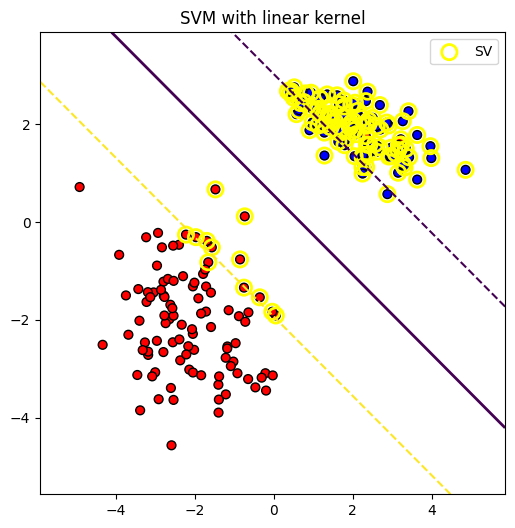

In [173]:
linear_svm = SVM("linear", 0.025)
linear_svm.fit(X, y)
linear_svm.visualize()

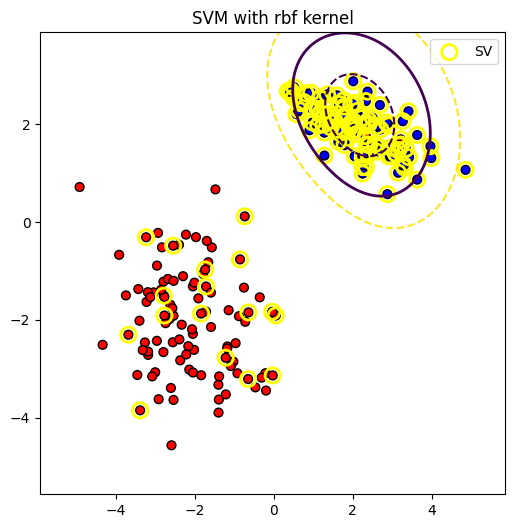

In [174]:
rbf_svm = SVM("rbf", np.inf)
rbf_svm.fit(X, y)
rbf_svm.visualize()